<div class="instructions">
Complete all **Exercises**, and submit answers to **Questions** in the **Quiz: Week 3 Lab** on Coursera.
</div>

## Getting Started

In this lab we will review exploratory data analysis using the `ggplot2` 
package for data visualization, which is included in the `tidyverse`. The main 
focus of this lab is to be able to obtain and interpret credible intervals and 
hypothesis tests using Bayesian methods for numerical variables. The data and 
functions for inference can be found in the companion package for this course, 
`statsr`. 

Let's load the necessary packages for this week's lab:

In [1]:
library(PairedData)
library(tidyverse)
library(statsr)

Loading required package: MASS

Loading required package: gld

Loading required package: mvtnorm

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘PairedData’


The following object is masked from ‘package:base’:

    summary


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.0     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()

Loading required package: BayesFactor

Loading required package: coda

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (

### The data

In 2004, the state of North Carolina released a large data set containing 
information on births recorded in this state. This data set is useful to 
researchers studying the relation between habits and practices of expectant 
mothers and the birth of their children. We will work with a random sample 
of observations from this data set.

Let's load the `nc` data set into our workspace from the `statsr` package.

In [2]:
data(nc)

We have observations on 13 different variables, some categorical and some 
numerical. The meaning of each variable is as follows.

variable         | description
---------------- | ---------------------------------------------
`fage`           | father's age in years.
`mage`           | mother's age in years.
`mature`         | maturity status of mother.
`weeks`          | length of pregnancy in weeks.
`premie`         | whether the birth was classified as premature (premie) or full-term.
`visits`         | number of hospital visits during pregnancy.
`marital`        | whether mother is `married` or `not married` at birth.
`gained`         | weight gained by mother during pregnancy in pounds.
`weight`         | weight of the baby at birth in pounds.
`lowbirthweight` | whether baby was classified as low birthweight (`low`) or not (`not low`).
`gender`         | gender of the baby, `female` or `male`.
`habit`          | status of the mother as a `nonsmoker` or a `smoker`.
`whitemom`       | whether mom is `white` or `not white`.

Note: These data should be familiar for those  who took the 
*Inferential Statistics* course as part of the *Statistics with R* 
specialization, where the `nc` data were  used in the 
**Inference for Numerical Data** lab.

### EDA

As a first step in the analysis, let's take a look at the variables in the 
dataset and how `R` has encoded them. The most straight forward way of doing 
this is using the `glimpse` function.

In [3]:
glimpse(nc)

Rows: 1,000
Columns: 13
$ fage           <int> NA, NA, 19, 21, NA, NA, 18, 17, NA, 20, 30, NA, NA, NA,…
$ mage           <int> 13, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16,…
$ mature         <fct> younger mom, younger mom, younger mom, younger mom, you…
$ weeks          <int> 39, 42, 37, 41, 39, 38, 37, 35, 38, 37, 45, 42, 40, 38,…
$ premie         <fct> full term, full term, full term, full term, full term, …
$ visits         <int> 10, 15, 11, 6, 9, 19, 12, 5, 9, 13, 9, 8, 4, 12, 15, 7,…
$ marital        <fct> married, married, married, married, married, married, m…
$ gained         <int> 38, 20, 38, 34, 27, 22, 76, 15, NA, 52, 28, 34, 12, 30,…
$ weight         <dbl> 7.63, 7.88, 6.63, 8.00, 6.38, 5.38, 8.44, 4.69, 8.81, 6…
$ lowbirthweight <fct> not low, not low, not low, not low, not low, low, not l…
$ gender         <fct> male, male, female, male, female, male, male, male, mal…
$ habit          <fct> nonsmoker, nonsmoker, nonsmoker, nonsmoker, nonsmoker, …
$ whitemom      

Another useful function is `summary` which provides the range, quartiles, and 
means for numeric variables and counts for categorical variables. Additionally, 
if there are any missing observations (denoted `NA`), summary will provide the 
number of missing cases for each variable. Note that the output of the summary 
function can be too long and difficult to parse  visually and interpret if the 
dataset has a large number of variables.

In [4]:
summary(nc)

      fage            mage            mature        weeks             premie   
 Min.   :14.00   Min.   :13   mature mom :133   Min.   :20.00   full term:846  
 1st Qu.:25.00   1st Qu.:22   younger mom:867   1st Qu.:37.00   premie   :152  
 Median :30.00   Median :27                     Median :39.00   NA's     :  2  
 Mean   :30.26   Mean   :27                     Mean   :38.33                  
 3rd Qu.:35.00   3rd Qu.:32                     3rd Qu.:40.00                  
 Max.   :55.00   Max.   :50                     Max.   :45.00                  
 NA's   :171                                    NA's   :2                      
     visits            marital        gained          weight      
 Min.   : 0.0   married    :386   Min.   : 0.00   Min.   : 1.000  
 1st Qu.:10.0   not married:613   1st Qu.:20.00   1st Qu.: 6.380  
 Median :12.0   NA's       :  1   Median :30.00   Median : 7.310  
 Mean   :12.1                     Mean   :30.33   Mean   : 7.101  
 3rd Qu.:15.0            

As you review the variable summaries, consider which variables are categorical 
and which are numerical. For numerical variables, are there outliers? If you 
aren't sure or want to take a closer look at the data, you can make a graph.

For example, we can examine the distribution of the amount of weight that a 
mother `gained` with a histogram.

Warning message:
“Removed 27 rows containing non-finite values (stat_bin).”


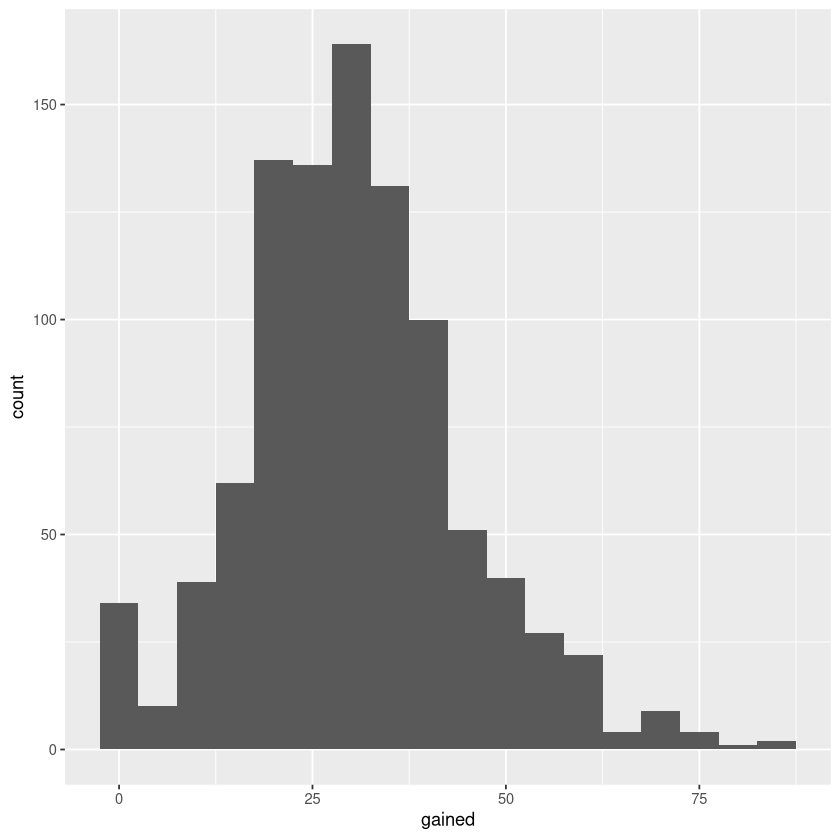

In [5]:
ggplot(data = nc, aes(x = gained)) +
  geom_histogram(binwidth = 5)

This function says to plot the `gained` variable from the `nc` data frame on the 
x-axis. It also defines a `geom` (short for geometric object), which describes 
the type of plot you will produce. We used a binwidth of 5, however you can 
change this value and see how it affects the shape of the histogram. Also note 
that the function results in a warning saying that 27 rows have been removed. 
This is because 27 observations in the data have `NA` values for weight gained. 
You can confirm this by peeking back at the summary output above. If you need a 
refresher on using `ggplot2`, you may want to take some time to review the 
material in the earlier courses in this specialization.

<div class="question">
How many of the 13 variables are categorical?

* 5
* 6
* 7
* 8
</div>

**Answer**: 7. Obtained from the summary function.

We will start with analyzing the weight of the babies at birth, which is 
contained in the variable `weight`.

<div class="question">
Use a visualization such as a histogram and summary statistics tools in R to 
analyze the distribution of `weight`. Which of the following best describes the 
distribution of `weight`?

* Left skewed
* Right skewed
* Uniformly distributed
* Normally distributed
</div>

**Answer**: A. Slightly Left Skewed

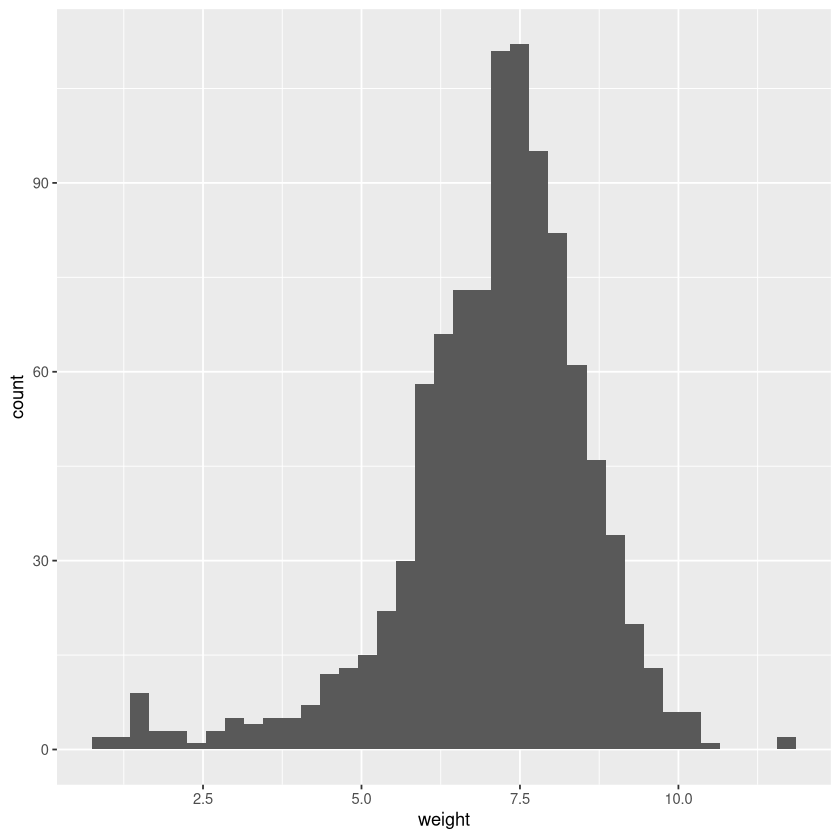

In [33]:
# Type your code for Question 2 here.
ggplot(data = nc, aes(x = weight)) +
  geom_histogram(binwidth = .3)

The variable `premie` in the dataframe classifies births on whether they were 
full-term or premie. We can use some of the functions of `dplyr` to create a 
new dataframe to limit the analysis to full term births.

In [8]:
nc_fullterm = filter(nc, premie == 'full term')
summary(nc_fullterm)

      fage            mage            mature        weeks             premie   
 Min.   :14.00   Min.   :13   mature mom :109   Min.   :37.00   full term:846  
 1st Qu.:25.00   1st Qu.:22   younger mom:737   1st Qu.:38.00   premie   :  0  
 Median :30.00   Median :27                     Median :39.00                  
 Mean   :30.24   Mean   :27                     Mean   :39.25                  
 3rd Qu.:35.00   3rd Qu.:32                     3rd Qu.:40.00                  
 Max.   :50.00   Max.   :50                     Max.   :45.00                  
 NA's   :132                                                                   
     visits             marital        gained          weight      
 Min.   : 0.00   married    :312   Min.   : 0.00   Min.   : 3.750  
 1st Qu.:10.00   not married:534   1st Qu.:22.00   1st Qu.: 6.750  
 Median :12.00                     Median :30.00   Median : 7.440  
 Mean   :12.35                     Mean   :31.13   Mean   : 7.459  
 3rd Qu.:15.00      

The `filter` function selects variables all variables from the dataframe `nc` 
where the condition `premie` equals "full term" is met.

<div class="exercise">
Repeat the visualization and summary with the weights from full term term 
births. Does `weight` appear to be approximately normally distributed?
</div>

**Answer**: From the summary statistics, the median and mean are close to each other. Since we have taken some samples from a normal distribution, we expect a normally distributed sample. We can find it out plotting the histogram bars again.

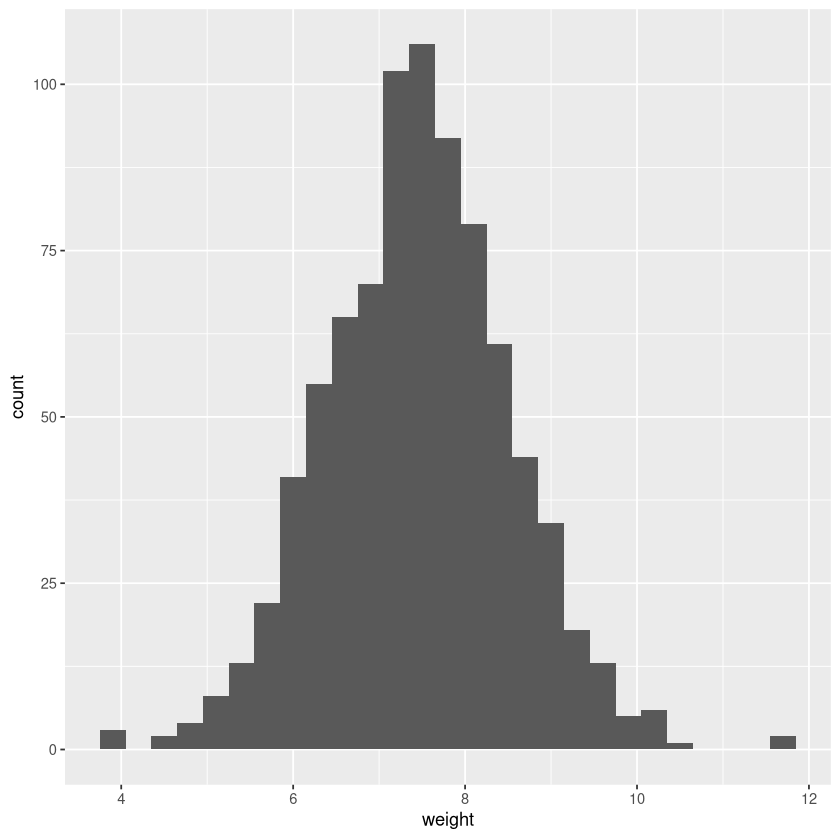

In [34]:
# Type your code for Question 2 here.
ggplot(data = nc_fullterm, aes(x = weight)) +
  geom_histogram(binwidth = .3)



## Inference

Next we will introduce a function `bayes_inference` that we will use for 
constructing credible intervals and conducting hypothesis tests. The following 
illustrates how we would use the function `bayes_inference` to construct a 95% 
credible interval of `weight`; the Bayesian analogue to a 95% confidence 
interval.


Single numerical variable
n = 846, y-bar = 7.4594, s = 1.075
(Assuming Zellner-Siow Cauchy prior:  mu | sigma^2 ~ C(7.7, 1*sigma)
(Assuming improper Jeffreys prior: p(sigma^2) = 1/sigma^2

Posterior Summaries
           2.5%      25%       50%       75%      97.5%
mu    7.3863257 7.433597  7.459114  7.483879   7.531706
sigma 1.0257925 1.059020  1.076487  1.093485   1.129202
n_0   0.9010984 9.875219 23.610322 47.099319 126.927564

95% CI for mu: (7.3863, 7.5317)


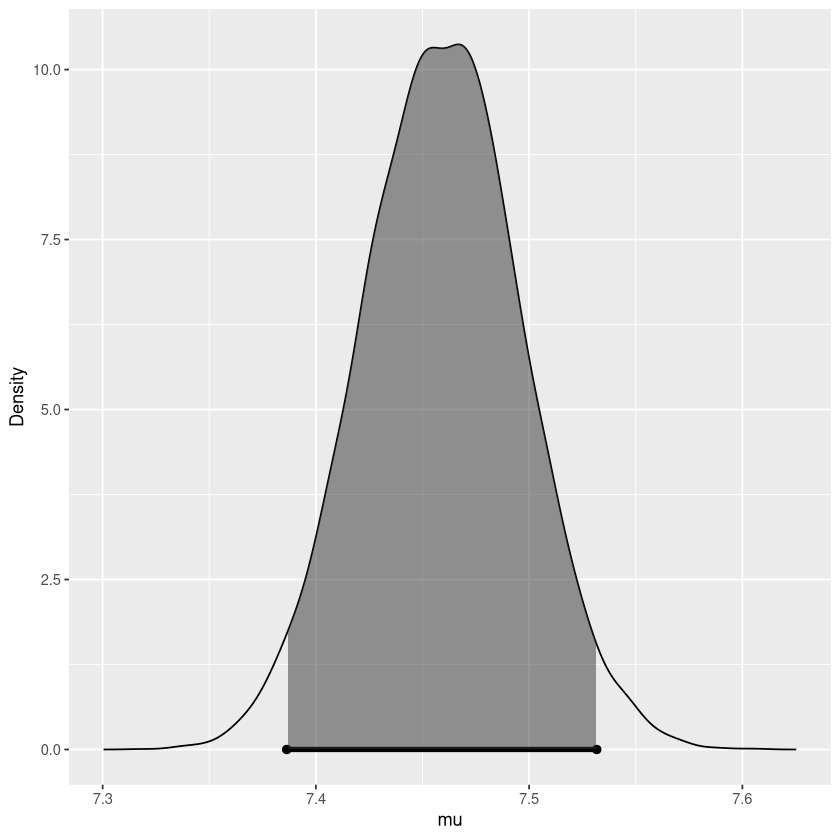

In [9]:
bayes_inference(y = weight, data = nc_fullterm, 
                statistic = "mean", type = "ci",  
                prior_family = "JZS", mu_0 = 7.7, rscale = 1,
                method = "simulation",
                cred_level = 0.95)

Let's look at the meanings of the arguments of this custom function. The first 
argument `y` specifies the response variable that we are interested in: `weight`.
The second argument, `data`, specifies the dataset `nc_fullterm` that contains 
the variable `weight`. The third argument `statistic` is the sample statistic 
we're using, or similarly, the population parameter we're estimating. The 
argument `type` specifies the type of inference that we want: credible 
intervals (`type = "ci"`), or hypothesis tests (`type = "ht"`). The argument `prior` 
indicates which prior distribution for any unknown parameters we will use for inference or testing, with options `JZS` (the Jeffreys-Zellner-Siow prior which 
is the Jeffreys prior for the unknown variance and a Cauchy prior for the mean), 
`JUI` (the Jeffreys-Unit Information prior which is the Jeffreys prior for the 
variance and the Unit Information Gaussian prior for the mean), `NG` (the 
conjugate Normal-Gamma prior for the mean and inverse of the variance) or `ref` 
(the independent Jeffreys reference prior for the variance and the uniform prior 
for the mean). As we would like to use the same prior for constructing credible 
intervals and hypothesis testing later with results that are robust if we 
mis-specify the prior, we will use the `JZS` option. For all of the 
`prior_family` options, we need to specify prior hyperparameters. For `JZS`, 
the prior on standardized effect $\mu/\sigma$ is a Cauchy centered at `mu_0` 
and with a scale of `rscale`. By default these are zero and one respectively. 
The average birthweight for full term births in the US in 1994-1996 was 7.7 
pounds, which we will use as the center of our prior distribution using the 
argument `mu_0 = 7.7`. We will use the default argument `rscale = 1`. The method of inference can be either 
`method = "theoretical"` (theoretical based) or `"simulation"` based; in the 
case of the `JZS` prior for credible intervals, `"simulation"` is the only 
option as there are no closed form results.  We 
also specify that we are looking for the 95% credible interval by setting 
`cred_level = 0.95`, which is the default. 
For more information on the `bayes_inference` function see the help file with 
`?bayes_inference`.

<div class="question">
Which of the following corresponds to the **95%** credible interval for the 
average birth weight of all full-term babies born in North Carolina?

* There is a 95% chance that babies weigh 7.4 to 7.5 pounds. 
* There is a 95% chance that the average weights of babies in this sample is between 7.4 an 7.5 pounds. 
* There is a 95% chance that babies on average weigh 7.4 to 7.5 pounds. 

**Answer**: C. There is a 95% chance that babies on average weigh 7.4 to 7.5 pounds.

We can also conduct a Bayesian hypothesis test by calculating Bayes factors or 
posterior probabilities. Let us test to see if the average birth weight in North 
Carolina for full term births is significantly different from the US average of 
7.7 pounds from 1994-96. The two competing hypotheses are:

$$ H_1: \mu = 7.7 $$
$$ H_2: \mu \ne 7.7 $$

To conduct this hypothesis test, we will need to change the `type` argument to 
hypothesis test, `type = "ht"` in the `bayes_inference` function. In addition, we 
will need to add the type of alternative hypothesis as an additional argument 
`alternative = "twosided"`. For faster calculation, change the method to 
`theoretical` and add `show_plot=FALSE`.

<div class="question">
Based of Jeffrey's scale for interpretation of a Bayes factors how should we 
describe the evidence against $H_1$ from your results for the hypothesis test?

* Not worth a bare mention
* Positive
* Strong
* Very Strong
</div>

In [10]:
# Type your code for the Exercise here.

## Prediction using MCMC

A key advantage of Bayesian statistics is predictions and the probabilistic 
interpretation of predictions. Much of Bayesian prediction is done using 
simulation techniques, some of which was discussed near the end of this module. 
We will go over a simple simulation example to obtain the predictive distribution 
of the variable `weight` using the output of `bayes_inference` which we will 
save to the object `weight_post`:

Single numerical variable
n = 846, y-bar = 7.4594, s = 1.075
(Assuming Zellner-Siow Cauchy prior:  mu | sigma^2 ~ C(7.7, 1*sigma)
(Assuming improper Jeffreys prior: p(sigma^2) = 1/sigma^2

Posterior Summaries
           2.5%      25%       50%       75%      97.5%
mu    7.3847062 7.434489  7.459202  7.484019   7.531804
sigma 1.0267506 1.058650  1.076142  1.093873   1.128721
n_0   0.8956781 9.971760 23.850319 48.296138 124.653601

95% CI for mu: (7.3847, 7.5318)


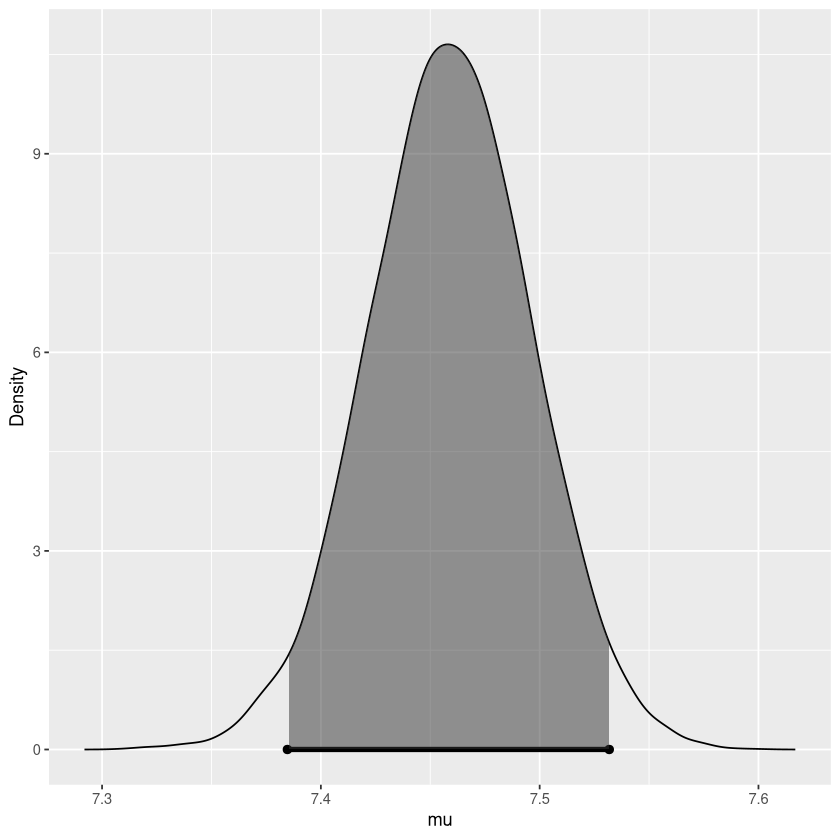

In [11]:
weight_post = bayes_inference(y = weight, data = nc_fullterm, 
                              statistic = "mean", type = "ci",  
                              prior_family = "JZS", mu_0 = 7.7, rscale = 1,
                              method = "simulation",
                              cred_level = 0.95)

The `names` function can list the output or objects that are stored in the object created by `bayes_inference`:

In [12]:
names(weight_post)

[1] "mu"         "post_den"   "cred_level" "post_mean"  "post_sd"   
[6] "ci"         "samples"    "summary"    "plot"

In particular, the `samples` object is a `matrix` or table which contain the draws from the MCMC 
simulation, and includes columns for `mu` and  `sig2`, which are posterior samples of the mean and variance respectively.  Let's see how we can use these to make predictions.

### Posterior predictive distribution of new observation $y_{n+1}$

The distribution of any new observation conditional on the mean and variance is 
$$N(\mu, \sigma^2)$$ and if we knew $\mu$ and $\sigma^2$ we could draw a sample 
from the distribution of the new observation from the normal distribution. 
While we do not know $\mu$ and $\sigma^2$ we the draws of $\mu$ and $\sigma^2$ 
from their posterior distributions. If we substitute these values into the 
normal distribution for $Y_{n+1}$, we can obtain samples from the predictive 
distribution for the birth weight for any new observation $y_{1001}$. 

We'll first convert our `samples` into a dataframe and then use `mutate` the create draws from the predictive distribution using `rnorm`:

In [13]:
samples = as.data.frame(weight_post$samples)
nsim = nrow(samples)
samples = mutate(samples, y_pred = rnorm(nsim, mu, sqrt(sig2)))

We can view an estimate of the predictive distribution, by looking at a 
smoothed version of the histogram of the simulated data:

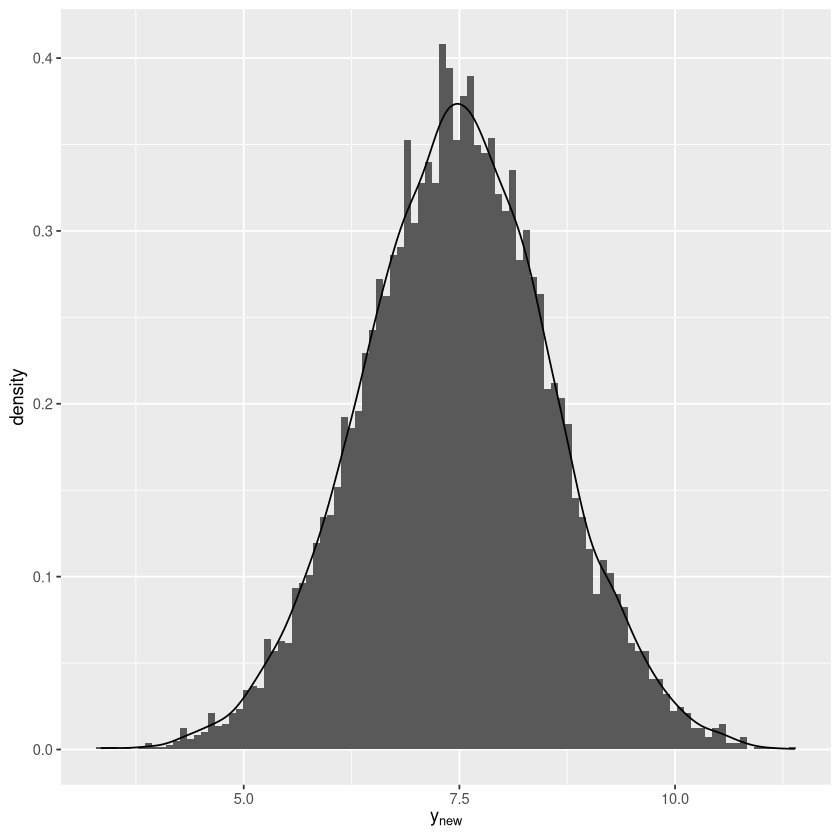

In [14]:
ggplot(data = samples, aes(x = y_pred)) + 
  geom_histogram(aes(y = ..density..), bins = 100) +
  geom_density() + 
  xlab(expression(y[new]))

A 95% central credible interval for a new observation is the interval (L, U) 
where $P(Y_{new} < L \mid Y) = 0.05/2$ and $P(Y_{new} > U \mid Y) = 0.05/2)$. 
In this case, since the posterior distribution of $\mu$ and $Y_{new}$ are both 
symmetric, we can set L to be the 0.025 quantile and U to be the 0.975 quantile. 
Using the `quantile` function `R` we can find the 0.025 and 0.975, as well as 
median (0.50) quantiles of the predictive distribution:

In [15]:
dplyr::select(samples, mu, y_pred) %>%
  map(quantile, probs=c(0.025, 0.50, 0.975))

$mu
    2.5%      50%    97.5% 
7.384706 7.459202 7.531804 

$y_pred
    2.5%      50%    97.5% 
5.294301 7.478517 9.629883

In the above code we are using `dplyr:select` to select just the columns `mu` and `y_pred` from `samples`.  The usage of `dplyr:` preceeding `select`, ensures that we are using the `select` function from the `dplyr` package to avoid possible name conflicts, as several packages have a `select` function.  We are also taking advantage of the pipe operator to send the selected columns to the `map` function to apply the `quantile` function to each of the selected columns for the probabilities in the argument `probs` to `quantile`.

<div class="question">
For predicting the birth weight of a new full term baby in NC, 

* there is a 95% chance that their birth weight will be 7.4 to 7.5 pounds.
* there is a 95% chance that their birth weight will be on average 7.4 to 7.5 pounds.
* there is a 95% chance that their birth weight will be 5.4 to 9.5 pounds.
* there is 50% chance that their birth weight will be 7.4 pounds.
</div>

In [16]:
# Type your code for Question 5 here.

<div class="exercise">
Repeat the above analysis but find the predictive distribution for babies that 
were premature. 
</div>

In [17]:
# Type your code for Exersice 2 here.

## Bayesian inference for two independent means

Next, let us consider whether there is a difference of baby weights for babies 
born to smokers and non-smokers. Here we will use the variable `habit` to 
distinguish between babies born to mothers who smoked and babies born to mothers 
who were non-smokers. Plotting the data is a useful first step because it helps 
us quickly visualize trends, identify strong associations, and develop research 
questions.

To create side by side boxplots by levels of a categorical variable `x`, we can 
use the following:

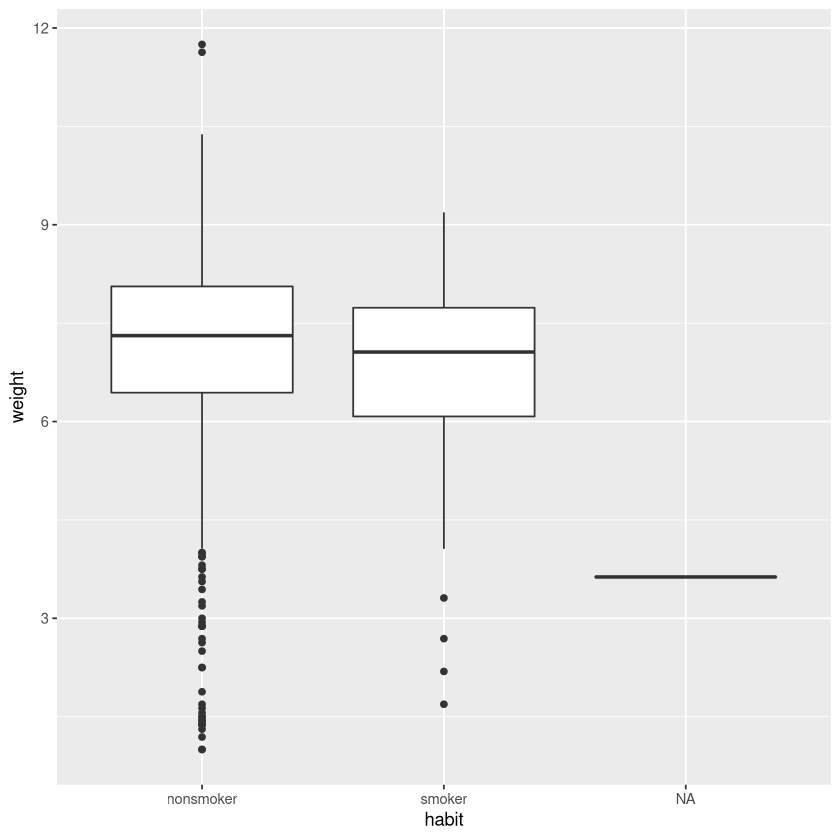

In [18]:
ggplot(nc, aes(x = habit, y = weight)) +
  geom_boxplot()

to create side-by-side boxplots of `weight` for smokers and non-smokers.

<div class="question">
Construct a side-by-side boxplot of `habit` and `weight` for the data using full 
term births and compare the two distributions. Which of the following is *false* 
about the relationship between `habit` and `weight`?

* Median birth weight of babies born to non-smokers is slightly higher than that of babies born to smokers.
* Range of birth weights of female babies are roughly the same as that of male babies.
* Both distributions are approximately symmetric.
* The IQRs of the distributions are roughly equal.
</div>

In [19]:
# Type your code for the question here.

The box plots show how the medians of the two distributions compare, but we can 
also compare the means of the distributions using the following to first group 
the data by the `habit` variable, and then calculate the mean `weight` in these 
groups using the `mean` function, where the `%>%` pipe operator takes the output 
of one function and then *pipes* it into the next function.

In [20]:
nc_fullterm %>%
  group_by(habit) %>%
  summarise(mean_weight = mean(weight))

habit,mean_weight
<fct>,<dbl>
nonsmoker,7.501123
smoker,7.171308


There is an observed difference, but is this difference statistically 
significant? In order to answer this question we will conduct a 
Bayesian hypothesis test.

As before, we can use the `bayes_inference` function to test the hypothesis the 
mean weight of babies born to non-smokers is different than the mean weight of 
babies born to smokers. The call is almost identical to the single mean case, 
except now we will provide `habit` as an explanatory variable (argument 
`x = habit`). Here, we use the theoretical method instead of simulation 
(argument `method = "theoretical"`).

In [21]:
bayes_inference(y = weight, x = habit, data = nc_fullterm, 
                statistic = "mean", 
                type = "ht", alternative = "twosided", null = 0, 
                prior = "JZS", rscale = 1, 
                method = "theoretical", show_plot = FALSE)

Response variable: numerical, Explanatory variable: categorical (2 levels)
n_nonsmoker = 739, y_bar_nonsmoker = 7.5011, s_nonsmoker = 1.0833
n_smoker = 107, y_bar_smoker = 7.1713, s_smoker = 0.9724
(Assuming Zellner-Siow Cauchy prior on the difference of means. )
(Assuming independent Jeffreys prior on the overall mean and variance. )
Hypotheses:
H1: mu_nonsmoker  = mu_smoker
H2: mu_nonsmoker != mu_smoker

Priors: P(H1) = 0.5  P(H2) = 0.5 

Results:
BF[H2:H1] = 6.237
P(H1|data) = 0.1382 
P(H2|data) = 0.8618 


<div class="question">
Based on the Bayes factor calculated above, how strong is evidence against $H_1$?

* Not worth a bare mention
* Positive
* Strong
* Very Strong
</div>

<div class="question">
How would the Bayes factor above change if we were to increase the prior 
probability of $H_2$ to 0.75? (Hint: you may change the prior of $H_1$ and $H_2$ 
by specifying `hypothesis_prior = c(a, b)` where $P(H_1) = a$, $P(H_2) = b$, and 
$a+b = 1$.)

* Get bigger
* Get smaller
* Stay the same
</div>

In [22]:
# Type your code for the question here.

If differences between the groups are expected to be small, using a value of 
`rscale = sqrt(2)/2` in the `JZS` prior is recommended. 

<div class="question">
How would the Bayes factor for H2 to H1 change if we were to change the scale 
in the Cauchy prior `rscale = sqrt(2)/2`?

* Get bigger
* Get smaller
* Stay the same
</div>

In [23]:
# Type your code for  Question 9 here.

To quantify the magnitude of the differences in mean birth weight, we can use a 
credible interval. Change the `type` argument to `"ci"` to construct and record 
a credible interval for the difference between the weights of babies born to 
nonsmoking and smoking mothers, and interpret this interval in context of the 
data. Note that by default you'll get a 95% credible interval. If you want to 
change the confidence level, change the value for `cred_level` which takes on a 
value between 0 and 1. Also note that when doing a credible interval arguments 
like `null` and `alternative` are not useful, so make sure to remove them, but 
include the prior mean `mu_0`.

<div class="question">
Based on the 95% credible interval for the differences in full term birth 
weights for nonsmokers and smoker:

* there is a 95% chance that babies born to nonsmoker mothers are on average 0.11 to 0.54 pounds lighter at birth than babies born to smoker mothers. 
* there is a 95% chance that the difference in average weights of babies whose moms are smokers and nonsmokers is between 0.11 to 0.54 pounds. 
* there is a 95% chance that the difference in average weights of babies in this sample whose moms are nonsmokers and smokers is between 0.11 to 0.54 pounds. 
* there is a 95% chance that babies born to nonsmoker mothers are on average 0.11 to 0.54 pounds heavier at birth than babies born to smoker mothers. 
</div>

In [24]:
# Type your code for Question 10 here.

## Bayesian inference on Two Paired Means

The second data set comes from a 2008 study *A simple tool to ameliorate 
detainees' mood and well-being in Prison: Physical activities*. The study was 
performed in a penitentiary of the Rhone-Alpes region (France), that includes 
two establishments, one for remand prisoners and short sentences (Jail) and the 
second for sentenced persons (Detention Centre, DC). A total number of 26 male 
subjects, imprisoned between 3 to 48 months, participated to the study. The 
participants were divided into two groups: 15 "Sportsmen" who chose 
spontaneously to follow the physical program; and 11 "References", who did not 
and wished to remain sedentary. This data provide the perceived stress scale 
(PSS) of the participants in prison at the entry (`PSSbefore`) and at the exit 
(`PSSafter`).

We can load the `PrisonStress` data set into our workspace using the `data` 
function once the `PairedData` package is loaded.

In [25]:
data("PrisonStress")

This data set consists of 26 observations on 4 variables. They are summarized as 
follows:

variable    | description        
------------|-----------------------------------------------------
`Subject`   | anonymous subjects
`Group`     | whether the subject chose to follow the physical programme `Sport` or not `Control`
`PSSbefore` | perceived stress measurement at the entry
`PSSafter`  | perceived stress measurement at the exit

We have two groups of observations: the `sport` group, the ones who chose to 
follow the physical training program; and the `control` group, the ones who 
chose not to follow. We are interested to know whether in average there is any 
difference in the perceived stress scale (PSS) before they started the training 
(at the entry) and after the training (at the exit).

We first analyze the `control` group data. We subset the data according to the 
`Group` variable using the `dplyr` package, and save this into a smaller data 
set `PPS.control`.

In [26]:
pss_control = PrisonStress %>%
  filter(Group == "Control") %>%
  mutate(diff = PSSbefore - PSSafter)

where the third line calculate the difference of the PSS of each subject before 
and after the training and saves it as a new variable `diff`.

We can now conduct the following hypothesis test:
$$ H_1: \mu_{\text{before}} = \mu_{\text{after}}\qquad \Longrightarrow \qquad H_1: \mu_{\text{diff}} = 0, $$

$$ H_2: \mu_{\text{before}} \neq \mu_{\text{after}}\qquad \Longrightarrow \qquad H_1: \mu_{\text{diff}} \neq 0, $$

We use `bayes_inference` function to calculate the Bayes factor. The code is 
similar to the one we used for inference for one mean, except that we need to 
set `null = 0`, because we are comparing the mean of the difference to 0.

In [27]:
bayes_inference(y = diff, data = pss_control, 
                statistic = "mean",
                type = "ht", alternative = "twosided", null = 0, 
                prior = "JZS", rscale = 1, 
                method = "simulation", show_plot = FALSE)

Single numerical variable
n = 11, y-bar = -7.3636, s = 9.2333
(Using Zellner-Siow Cauchy prior:  mu ~ C(0, 1*sigma)
(Using Jeffreys prior: p(sigma^2) = 1/sigma^2

Hypotheses:
H1: mu = 0 versus H2: mu != 0
Priors:
P(H1) = 0.5 , P(H2) = 0.5
Results:
BF[H2:H1] = 2.7364
P(H1|data) = 0.2676  P(H2|data) = 0.7324 


While there appears to an increase in stress, based on Jeffrey's scales of 
evidence, the evidence against H1 is `*worth a bare mention*'.

<div class="question">
Conduct the same hypothesis test for the mean of the difference in perceived 
stress scale for the `sport` group. Based of Jeffrey's scale for interpretation 
of a Bayes factors how should we describe the evidence against $H_1$ from the 
results?

* Not worth a bare mention
* Positive
* Strong
* Very strong
</div>

In [28]:
# Type your code for Question 11 here.

It is possible that other factors during this period of time could affect stress. 
By combining data from both groups we can increase our sample size, which 
provides greater power to detect a difference due to the intervention. If we 
assume that the variation in the two groups is comparable, we can use the 
differences in the before and after measurements to compare whether the 
intervention had an effect on stress levels. 

<div class="exercise">
Create a new data frame with a variable that is the difference in pre and post 
stress measurements and test the hypothesis that the mean difference in the 
control group is equal to the mean in the sport group versus the hypothesis 
that the means are not equal.
</div>

In [29]:
# Type your code for Exercise 2 here.